In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import nltk
from nltk.corpus import stopwords
from collections import Counter


#libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\avams\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df= pd.read_csv("spam.csv",encoding='ISO-8859-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [4]:
columns_to_drop = ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"]
df.drop(columns=columns_to_drop, inplace=True)

In [5]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [6]:
new_column_names = {"v1":"Category","v2":"Message"}
df.rename(columns = new_column_names,inplace = True)

In [7]:
df[df.duplicated()]

,Category,Message
102,ham,As per your request 'Melle Melle (Oru Minnamin...
153,ham,As per your request 'Melle Melle (Oru Minnamin...
206,ham,"As I entered my cabin my PA said, '' Happy B'd..."
222,ham,"Sorry, I'll call later"
325,ham,No calls..messages..missed calls
...,...,...
5524,spam,You are awarded a SiPix Digital Camera! call 0...
5535,ham,"I know you are thinkin malaria. But relax, chi..."
5539,ham,Just sleeping..and surfing
5553,ham,Hahaha..use your brain dear


In [8]:
df=df.drop_duplicates()
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5169 non-null   object
 1   Message   5169 non-null   object
dtypes: object(2)
memory usage: 121.1+ KB


In [10]:
df.describe()

,Category,Message
count,5169,5169
unique,2,5169
top,ham,"Go until jurong point, crazy.. Available only ..."
freq,4516,1


In [11]:
df.shape

(5169, 2)

In [12]:
df['Category'].value_counts()

ham     4516
spam     653
Name: Category, dtype: int64

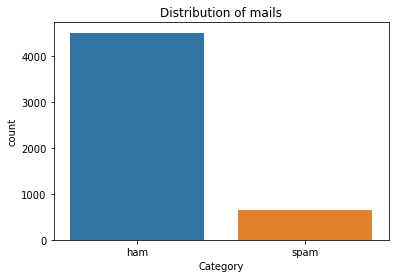

In [13]:
sns.countplot(data=df, x='Category')
plt.xlabel('Category')
plt.ylabel('count')
plt.title('Distribution of mails')
plt.show()

In [14]:
df.loc[df["Category"] == "spam", "Category"] = 0
df.loc[df["Category"] == "ham", "Category"] = 1
df.head()

C:\Users\avams\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\avams\anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


,Category,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
X = df["Message"]
Y = df["Category"]

In [16]:
X

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5169, dtype: object

In [17]:
Y

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5169, dtype: object

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [19]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5169,)
(4135,)
(1034,)


In [20]:
feature_extraction = TfidfVectorizer(min_df=1, stop_words="english", lowercase=True)

In [21]:
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

In [22]:
Y_train = Y_train.astype(int)
Y_test = Y_test.astype(int)

In [23]:
print(X_train)

2228                       Those were my exact intentions
5529                            What about this one then.
2149                   Waaaat?? Lololo ok next time then!
5058    Free video camera phones with Half Price line ...
5051    Tick, tick, tick .... Where are you ? I could ...
                              ...                        
4740    Many more happy returns of the day. I wish you...
474     Nice line said by a broken heart- Plz don't cu...
3266                    Ok then i come n pick u at engin?
4016    Eek that's a lot of time especially since Amer...
879     U have a Secret Admirer who is looking 2 make ...
Name: Message, Length: 4135, dtype: object


In [24]:
print(X_train_features)

  (0, 3545)	0.7455593142248959
  (0, 2588)	0.6664392762829205
  (2, 6589)	0.3136674984299076
  (2, 4696)	0.29654379102529516
  (2, 4002)	0.6378379419700079
  (2, 6999)	0.6378379419700079
  (3, 564)	0.2785767488573773
  (3, 1534)	0.23384958966251285
  (3, 52)	0.26549489341098675
  (3, 4344)	0.22076773421612225
  (3, 6770)	0.2300494583671639
  (3, 251)	0.19582167067522926
  (3, 4299)	0.18532229917229942
  (3, 4630)	0.26549489341098675
  (3, 1997)	0.26549489341098675
  (3, 516)	0.19460402332334106
  (3, 4419)	0.2562131692599451
  (3, 271)	0.23384958966251285
  (3, 5450)	0.2300494583671639
  (3, 3941)	0.18912243046764834
  (3, 5171)	0.20953002785296104
  (3, 3168)	0.19120469004402674
  (3, 4954)	0.23384958966251285
  (3, 1553)	0.20428654549041733
  (3, 6938)	0.19708708091575408
  :	:
  (4132, 1825)	0.3605065932469792
  (4132, 4696)	0.3418197199207224
  (4133, 5893)	0.376872105216547
  (4133, 4973)	0.36369662422743665
  (4133, 2451)	0.376872105216547
  (4133, 901)	0.36369662422743665
  (413

In [25]:
model = LogisticRegression()
model.fit(X_train_features, Y_train)

LogisticRegression()

In [26]:
prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)

In [27]:
print("Accuracy on training data:",accuracy_on_training_data)

Accuracy on training data: 0.9613059250302297


In [28]:
prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test,prediction_on_test_data)

In [29]:
prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test,prediction_on_test_data)

In [30]:
input_mail = ["Congratulations! You've won a free vacation to an exotic island. Just click on the link below to claim your prize."]
input_data_features = feature_extraction.transform(input_mail)
prediction = model.predict(input_data_features)

if (prediction)[0] == 1:
    print("Ham Mail")
else:
    print("Spam Mail")

Spam Mail


In [31]:
input_mail = ["This is a friendly reminder about our meeting scheduled for tomorrow at 10:00 AM in the conference room. Please make sure to prepare your presentation and bring any necessary materials."]
input_data_features = feature_extraction.transform(input_mail)
prediction = model.predict(input_data_features)

if (prediction)[0] == 1:
    print("Ham Mail")
else:
    print("Spam Mail")

Ham Mail


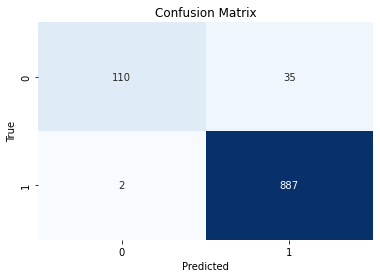

In [32]:
cm = confusion_matrix(Y_test, prediction_on_test_data)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [36]:
df.duplicated().sum()

0

In [37]:
df.isnull().sum()

Category    0
Message     0
dtype: int64